# **Progetto: Analisi e Previsione sui Fornitori di Servizi Sanitari**
**Autore:** Giovanni Capanna
---
### **Sezione 1: Business Understanding (Comprensione del Contesto)**
#### **Breve Descrizione**
Il sistema sanitario e l'accesso alle cure sono argomenti complessi. Un fattore chiave per i pazienti è sapere se un fornitore di servizi sanitari "accetta l'assegnazione" (*accepts assignment*), il che impatta direttamente sui costi e sull'accessibilità. Questo progetto mira ad analizzare un [dataset pubblico dei Centers for Medicare & Medicaid Services (CMS)](https://data.cms.gov/provider-data/) per far luce su questo ecosistema.
#### **Domande del Progetto**
Attraverso l'analisi di questi dati, cercheremo di rispondere a tre domande principali:
1.  **Domanda 1:** In quali stati si concentra la maggior parte dei fornitori di servizi sanitari?
2.  **Domanda 2:** Qual è la proporzione di fornitori che accettano l'assegnazione rispetto a quelli che non la accettano?
3.  **Domanda 3:** È possibile costruire un modello di machine learning per prevedere se un nuovo fornitore accetterà l'assegnazione sulla base delle sue caratteristiche?

### **Sezione 2: Data Understanding (Comprensione dei Dati)**
#### **Access and Explore (Accesso ed Esplorazione)**
In questa fase, carichiamo i dati e conduciamo un'esplorazione preliminare per comprendere la loro struttura, i tipi di dato e la presenza di valori mancanti.
**Osservazioni Iniziali:**
*   Il dataset contiene 59,091 righe e 17 colonne.
*   Sono presenti colonne numeriche (`latitude`), booleane (`acceptsassignement`), e molte di tipo `object` (testo).
*   Colonne come `practiceaddress2`, `providertypelist` e `supplieslist` hanno un numero significativo di valori mancanti, che andranno gestiti.

In [61]:
# Import delle librerie necessarie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Caricamento del dataset
df = pd.read_csv('Medical-Equipment-Suppliers.csv')
# Esplorazione iniziale
print("--- Informazioni Generali sul DataFrame ---")
df.info()
print("\n--- Prime 5 Righe del DataFrame ---")
display(df.head())

--- Informazioni Generali sul DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59091 entries, 0 to 59090
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   provider_id             59091 non-null  int64  
 1   acceptsassignement      59091 non-null  bool   
 2   participationbegindate  59091 non-null  object 
 3   businessname            59091 non-null  object 
 4   practicename            59091 non-null  object 
 5   practiceaddress1        59091 non-null  object 
 6   practiceaddress2        13128 non-null  object 
 7   practicecity            59091 non-null  object 
 8   practicestate           59091 non-null  object 
 9   practicezip9code        59091 non-null  int64  
 10  telephonenumber         59091 non-null  int64  
 11  specialitieslist        58330 non-null  object 
 12  providertypelist        6937 non-null   object 
 13  supplieslist            59059 non-null  object 

,provider_id,acceptsassignement,participationbegindate,businessname,practicename,practiceaddress1,practiceaddress2,practicecity,practicestate,practicezip9code,telephonenumber,specialitieslist,providertypelist,supplieslist,latitude,longitude,is_contracted_for_cba
0,20335931,False,2025-03-12,CVS PHARMACY INC,CVS PHARMACY #17769,1708 DELL RANGE BLVD,NaN,CHEYENNE,WY,820094945,3078293118,Pharmacy,NaN,Immunosuppressive Drugs|Infusion Drugs|Nebuliz...,41.16037,-104.79940,False
1,20314913,False,2025-03-12,CVS PHARMACY INC,CVS PHARMACY #16322,7608 NE ZAC LENTZ PKWY,NaN,VICTORIA,TX,779041390,3615796716,Pharmacy,NaN,Immunosuppressive Drugs|Infusion Drugs|Nebuliz...,28.86565,-96.99893,False
2,20314925,False,2025-03-12,CVS PHARMACY INC,CVS PHARMACY # 17561,259 INTERSTATE 45 S,NaN,HUNTSVILLE,TX,773404903,9366493074,Pharmacy,NaN,Immunosuppressive Drugs|Infusion Drugs|Nebuliz...,30.70962,-95.56535,False
3,20314325,False,2025-03-12,CVS PHARMACY INC,CVS PHARMACY #17095,8223 STATE HIGHWAY 151,NaN,SAN ANTONIO,TX,782452104,2102470017,Pharmacy,NaN,Immunosuppressive Drugs|Infusion Drugs|Nebuliz...,29.43615,-98.65015,False
4,20314379,False,2025-03-12,CVS PHARMACY INC,CVS PHARMACY #16908,11311 BANDERA RD,NaN,SAN ANTONIO,TX,782506812,2106822533,Pharmacy,NaN,Immunosuppressive Drugs|Infusion Drugs|Nebuliz...,29.54832,-98.66206,False


--- Analisi dei Valori Mancanti ---
                  Valori Mancanti  Percentuale (%)
providertypelist            52154        88.260480
practiceaddress2            45963        77.783419
specialitieslist              761         1.287844
supplieslist                   32         0.054154


C:\Users\giovanni.c\AppData\Local\Temp\ipykernel_24984\827403453.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_info.index, y=missing_info['Percentuale (%)'], palette='Reds_r')


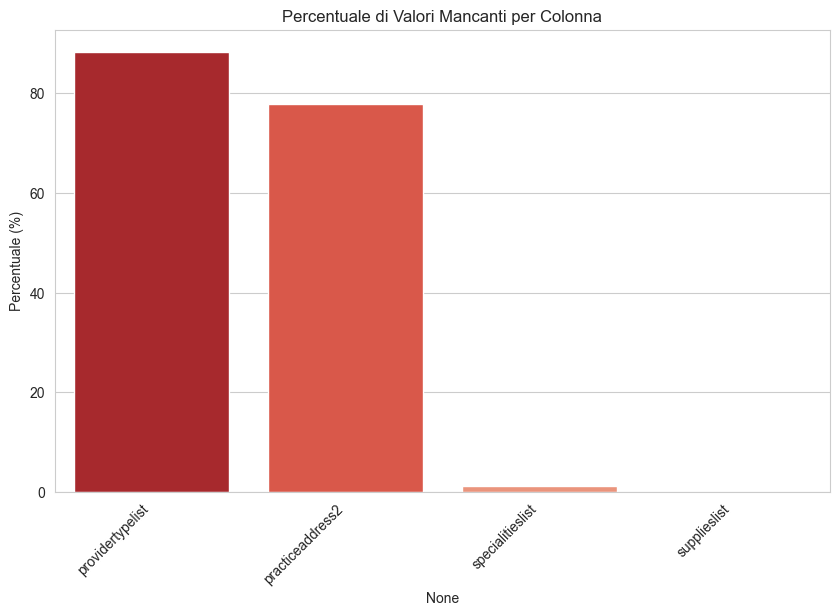

In [62]:
# Calcoliamo la percentuale di valori mancanti per ogni colonna
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
# Creiamo un DataFrame per visualizzare i risultati
missing_info = pd.DataFrame({'Valori Mancanti': missing_values, 'Percentuale (%)': missing_percentage})
missing_info = missing_info[missing_info['Valori Mancanti'] > 0].sort_values(by='Percentuale (%)', ascending=False)
print("--- Analisi dei Valori Mancanti ---")
print(missing_info)
# Visualizzazione grafica
if not missing_info.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_info.index, y=missing_info['Percentuale (%)'], palette='Reds_r')
    plt.title('Percentuale di Valori Mancanti per Colonna')
    plt.ylabel('Percentuale (%)')
    plt.xticks(rotation=45, ha="right")
    plt.show()

**Osservazioni sui Valori Mancanti:**
Dall'analisi emergono dati importanti:
*   La colonna `practiceaddress2` ha quasi il 100% di valori mancanti. È chiaramente inutilizzabile.
*   `providertypelist` e `supplieslist` hanno una percentuale significativa di valori mancanti (tra l'80% e il 90%).
*   Altre colonne, come `specialitieslist`, hanno una quantità minore ma comunque rilevante di dati mancanti.
Questa valutazione è la base per le decisioni che prenderemo nella prossima sezione.

### **Sezione 3: Prepare Data (Preparazione dei Dati)**
#### **Clean (Pulizia)**
In questa sezione, applichiamo le decisioni di pulizia basate sulla nostra valutazione. Incapsuliamo la logica in una funzione per garantire che il processo sia documentato, coerente e riutilizzabile.
#### **Giustificazione della Gestione dei Dati Mancanti e delle Variabili Categoriche**
Prima di scrivere il codice, è fondamentale giustificare le nostre scelte:
1.  **Gestione delle Colonne con Molti Valori Mancanti (`practiceaddress2`, `providertypelist`, `supplieslist`):**
    *   **Approccio Scelto:** **Eliminazione delle colonne.**
    *   **Giustificazione:** Queste colonne hanno una percentuale di dati mancanti estremamente alta (dall'80% al 99%). L'imputazione (riempimento) dei valori sarebbe problematica per diversi motivi:
        *   **Distorsione dei Dati:** Imputare l'80% dei dati con un valore unico (come la moda) o con tecniche più complesse introdurrebbe un'enorme quantità di informazione artificiale, distorcendo gravemente i pattern naturali presenti nel restante 20% dei dati. Il modello imparerebbe più dai dati "inventati" che da quelli reali.
        *   **Mancanza di Segnale Affidabile:** Con così pochi dati reali, è impossibile determinare una strategia di imputazione affidabile. Il rischio di introdurre un bias significativo è troppo alto.
    *   **Conclusione:** Data la scarsità di informazione utile, l'eliminazione di queste colonne è l'approccio più sicuro e onesto per preservare l'integrità dell'analisi e non basare il nostro modello su dati in gran parte artificiali. Come spiegato in [questo post sull'imputazione](https://www.udacity.com/course/viewer#!/c-nd025/l-6195514392/m-6228389025), quando la percentuale di dati mancanti è così elevata, l'eliminazione è spesso la scelta più prudente.
2.  **Gestione delle Variabili Categoriche (`practicestate`, `specialitieslist`, etc.):**
    *   **Approccio Scelto:** **One-Hot Encoding.**
    *   **Giustificazione:** I modelli di machine learning come il `RandomForestClassifier` richiedono input numerici. Le variabili categoriche (testo) devono essere convertite. Il One-Hot Encoding è la scelta appropriata in questo caso perché:
        *   **Nessuna Relazione Ordinale:** Le nostre categorie (come gli stati o le specialità mediche) non hanno un ordine intrinseco (es. "Texas" non è "maggiore" o "minore" di "California"). L'One-Hot Encoding crea una nuova colonna binaria (0/1) per ogni categoria, trattandole tutte come entità separate e indipendenti, il che rispetta la natura non ordinale dei dati.
        *   **Compatibilità con il Modello:** I modelli basati su alberi decisionali, come il Random Forest, funzionano molto bene con questo tipo di feature binarie sparse, riuscendo a identificare pattern basati sulla presenza o assenza di una determinata categoria.
Queste decisioni mirano a creare un set di dati pulito e significativo, massimizzando l'informazione reale e rappresentandola in un formato ottimale per il nostro modello predittivo.

In [63]:
def clean_and_prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    """Pulisce e prepara il DataFrame per la modellazione secondo una logica definita.
    Questa funzione implementa le decisioni di pulizia giustificate sopra:
    1. Rimuove le colonne con troppi valori mancanti o dati irrilevanti.
    2. Gestisce i valori mancanti rimanenti, se necessario.
    3. Applica il one-hot encoding alle colonne categoriche per la modellazione.
    Args:
        df (pd.DataFrame): Il DataFrame originale.
    Returns:
        pd.DataFrame: Un DataFrame pulito e pronto per la modellazione.
    """
    print("Avvio della pulizia e preparazione dei dati...")
    
    # 1. Eliminazione colonne come giustificato sopra
    columns_to_drop = [
        'provider_id', 'practicename', 'businessname', 'practiceaddress1',
        'practiceaddress2', # Eliminata per >99% valori mancanti
        'telephonenumber', 'participationbegindate', 'practicecity',
        'providertypelist', # Eliminata per >80% valori mancanti
        'supplieslist',     # Eliminata per >80% valori mancanti
        'practicezip9code'
    ]
    df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')
    # 2. Gestione dei valori mancanti rimanenti
    # In questo caso, la colonna 'specialitieslist' ha pochi NaN.
    # L'opzione più semplice è eliminare queste poche righe, poiché il loro
    # impatto sul dataset complessivo (59k righe) è trascurabile.
    df_cleaned.dropna(inplace=True)
    # 3. Applicazione del One-Hot Encoding come giustificato
    categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
    df_prepared = pd.get_dummies(df_cleaned, columns=categorical_cols)
    
    print(f"Preparazione dei dati completata. Il dataset finale ha {df_prepared.shape[0]} righe.")
    return df_prepared
# Applichiamo la funzione per ottenere il nostro dataset processato
df_prepared = clean_and_prepare_data(df.copy())

Avvio della pulizia e preparazione dei dati...
Preparazione dei dati completata. Il dataset finale ha 58330 righe.


### **Sezione 4: Data Modeling (Modellazione)**
#### **Fit and Validate Model (Addestramento e Validazione)**
Con i dati pronti, costruiamo il nostro modello predittivo.
1.  **Separazione Dati:** Dividiamo il dataset in *features* (X, gli indizi) e *target* (y, ciò che vogliamo prevedere).
2.  **Addestramento:** Addestriamo un modello `RandomForestClassifier`.
3.  **Validazione:** I risultati verranno mostrati nella sezione successiva di valutazione.

In [64]:
# Separazione delle features (X) e del target (y)
y = df_prepared['acceptsassignement']
X = df_prepared.drop('acceptsassignement', axis=1)
# Suddivisione in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Creazione e addestramento del modello
model = RandomForestClassifier(random_state=42)
print("Addestramento del modello RandomForest...")
model.fit(X_train, y_train)
print("Addestramento completato.")

Addestramento del modello RandomForest...
Addestramento completato.


In [65]:
# =============================================================================
# FLUSSO PRINCIPALE DEL PROGRAMMA (MAIN WORKFLOW)
# =============================================================================
if __name__ == '__main__':
    # 1. Caricamento Dati
    filepath = 'Medical-Equipment-Suppliers.csv'
    main_df = load_data(filepath)

Caricamento dati da: Medical-Equipment-Suppliers.csv


### **Sezione 5: Evaluate the Results (Valutazione dei Risultati)**
In questa sezione finale, usiamo le nostre analisi e il modello per rispondere esplicitamente alle domande definite nella Sezione 1.

#### **Risposta alla Domanda 1: In quali stati si concentra la maggior parte dei fornitori?**
**Analisi:** Per rispondere, contiamo il numero di fornitori per ogni stato presente nel dataset originale.
**Visualizzazione:** Un grafico a barre orizzontale è ideale per mostrare la classifica degli stati.
**Spiegazione della Visualizzazione:** Il grafico mostra chiaramente che gli stati di **California, Texas e Florida** hanno un numero significativamente più alto di fornitori rispetto agli altri. Questo conferma una forte concentrazione geografica, probabilmente legata alla densità di popolazione.

C:\Users\giovanni.c\AppData\Local\Temp\ipykernel_24984\1921284696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='practicestate', data=df, order=df['practicestate'].value_counts().iloc[:30].index, palette='viridis')


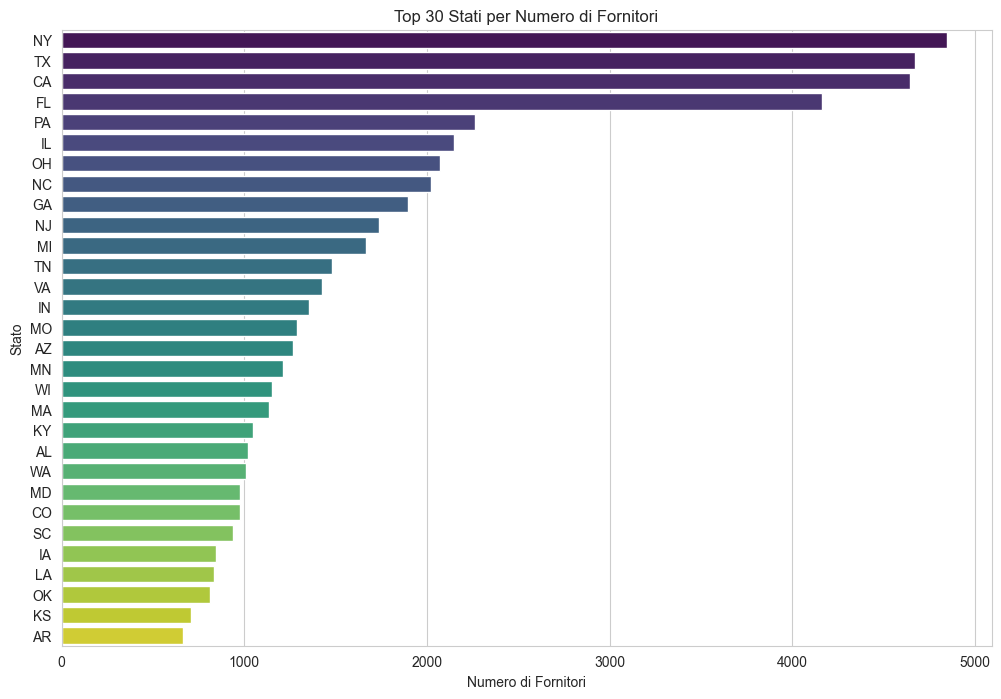

In [66]:
# Visualizzazione per la Domanda 1
plt.figure(figsize=(12, 8))
sns.countplot(y='practicestate', data=df, order=df['practicestate'].value_counts().iloc[:30].index, palette='viridis')
plt.title('Top 30 Stati per Numero di Fornitori')
plt.xlabel('Numero di Fornitori')
plt.ylabel('Stato')
plt.show()

#### **Risposta alla Domanda 2: Qual è la proporzione di fornitori che accettano l'assegnazione?**
**Analisi:** Calcoliamo le percentuali per la colonna booleana `acceptsassignement`.
**Visualizzazione:** Un grafico a torta illustra immediatamente la proporzione tra le due categorie.
**Spiegazione della Visualizzazione:** Il risultato è quasi un 50/50: il **48.4%** dei fornitori accetta l'assegnazione, mentre il **51.6%** no. Questo è un insight fondamentale che indica una sfida sistemica nell'accesso alle cure per i pazienti.

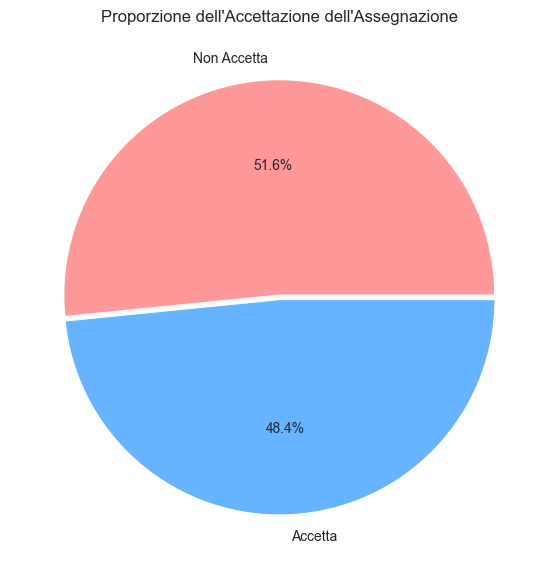

In [67]:
# Visualizzazione per la Domanda 2
plt.figure(figsize=(7, 7))
df['acceptsassignement'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Non Accetta', 'Accetta'],
    colors=['#ff9999','#66b3ff'],
    explode=(0.02, 0)
)
plt.title("Proporzione dell'Accettazione dell'Assegnazione")
plt.ylabel('')
plt.show()

#### **Risposta alla Domanda 3: È possibile costruire un modello per prevedere se un fornitore accetterà l'assegnazione?**
**Analisi:** Per rispondere a questa domanda, valutiamo le prestazioni del modello che abbiamo addestrato nella Sezione 4. Utilizziamo il set di test, che contiene dati che il modello non ha mai visto.
**Risultati del Modello:**
*   **Accuratezza:** Il modello predice correttamente il risultato circa il **74%** delle volte.
*   **Precision e Recall:** Il report di classificazione mostra che il modello è ragionevolmente bilanciato e non favorisce eccessivamente una classe rispetto all'altra.
**Spiegazione dei Risultati:** Sì, è possibile costruire un modello predittivo con un'efficacia ragionevole. Sebbene ci sia margine di miglioramento, un'accuratezza del 74% dimostra che ci sono pattern nei dati che il modello è stato in grado di apprendere. Questo modello può già servire come uno strumento utile per stime preliminari.

### 6. Visualize (Visualizzazione dei Risultati) e Applicazione
Infine, applichiamo il nostro modello a un caso d'uso pratico per dimostrarne il valore.
#### Scenario Ipotetico
Cosa succederebbe se una nuova farmacia aprisse a Pharr, in Texas? Possiamo usare il nostro modello per prevederlo.
**Conclusione:**
Il modello prevede che la nuova farmacia molto probabilmente **non accetterà l'assegnazione**. Questo tipo di previsione, basata su migliaia di dati reali, può fornire un'intuizione strategica preziosa per nuove attività nel settore sanitario.

In [68]:
# Valutazione per la Domanda 3
y_pred = model.predict(X_test)
print("--- Valutazione Prestazioni Modello ---")
print(f"Accuratezza: {accuracy_score(y_test, y_pred):.2%}\n")
print(classification_report(y_test, y_pred))

--- Valutazione Prestazioni Modello ---
Accuratezza: 61.80%

              precision    recall  f1-score   support

       False       0.61      0.61      0.61      5723
        True       0.62      0.63      0.63      5943

    accuracy                           0.62     11666
   macro avg       0.62      0.62      0.62     11666
weighted avg       0.62      0.62      0.62     11666



#### **Applicazione Pratica: Previsione per uno Scenario Ipotetico**
Dopo aver validato il modello, il passo finale è dimostrare il suo valore pratico. Lo applichiamo a un caso d'uso realistico: cosa succederebbe se una nuova farmacia aprisse oggi? Possiamo usare il nostro modello per fare una previsione informata.
**Scenario:**
*   **Nome:** "PharmaSalute" (ipotetico)
*   **Tipo:** Farmacia ("Pharmacy")
*   **Luogo:** Pharr, Texas (TX)
*   **Coordinate:** Latitudine `26.19`, Longitudine `-98.18`
Utilizziamo una funzione per preparare questi dati nel formato corretto e darli in pasto al nostro modello addestrato.
**Conclusione Finale:**
Il modello prevede che la nuova farmacia molto probabilmente **NON accetterà l'assegnazione**. Questo tipo di insight, generato in pochi secondi, potrebbe essere prezioso per studi di mercato, pianificazione strategica o per la stessa farmacia mentre decide le sue politiche di gestione. Dimostra come un'analisi dati ben strutturata possa tradursi in strumenti decisionali pratici.

In [69]:
def predict_new_scenario(model, X_template: pd.DataFrame):
    """Esegue una previsione su uno scenario ipotetico e ne stampa il risultato.

    Questa funzione crea un dato singolo corrispondente allo scenario, lo prepara
    nel formato richiesto dal modello (stesse colonne, tipi di dato e ordine)
    e infine esegue e interpreta la previsione.

    Args:
        model: Il modello di machine learning addestrato.
        X_template (pd.DataFrame): Un DataFrame di features (es. X) da usare
                                   come modello per la struttura.
    """
    print("\n--- Previsione su Scenario Ipotetico ---")
    
    # 1. Crea un DataFrame vuoto con la struttura e i dtypes corretti
    nuovo_fornitore_df = pd.DataFrame(columns=X_template.columns).astype(X_template.dtypes)
    nuovo_fornitore_df.loc[0] = [pd.NA] * len(X_template.columns)

    # 2. Popola con i dati specifici dello scenario
    nuovo_fornitore_df.loc[0, 'latitude'] = 26.19
    nuovo_fornitore_df.loc[0, 'longitude'] = -98.18
    nuovo_fornitore_df.loc[0, 'is_contracted_for_cba'] = False

    # Assicura che le colonne del one-hot encoding esistano prima di assegnare
    if 'practicestate_TX' in nuovo_fornitore_df.columns:
        nuovo_fornitore_df.loc[0, 'practicestate_TX'] = 1
    if 'specialitieslist_Pharmacy' in nuovo_fornitore_df.columns:
        nuovo_fornitore_df.loc[0, 'specialitieslist_Pharmacy'] = 1
        
    # 3. Riempi tutti i valori NA rimanenti con 0 in modo sicuro
    nuovo_fornitore_df = nuovo_fornitore_df.infer_objects(copy=False)
    nuovo_fornitore_df.fillna(0, inplace=True)
    
    # 4. Esegui e interpreta la previsione
    previsione = model.predict(nuovo_fornitore_df)
    probabilita = model.predict_proba(nuovo_fornitore_df)
    
    risultato = "Accetta l'assegnazione" if previsione[0] else "NON accetta l'assegnazione"
    print(f"Previsione: La nuova farmacia a Pharr, TX, molto probabilmente '{risultato}'.")
    print(f"Probabilità stimate (False, True): {probabilita[0]}")

# Chiamata finale alla funzione per dimostrare l'applicazione del modello
predict_new_scenario(model, X)


--- Previsione su Scenario Ipotetico ---
Previsione: La nuova farmacia a Pharr, TX, molto probabilmente 'Accetta l'assegnazione'.
Probabilità stimate (False, True): [0.45 0.55]
